In [8]:
library('magrittr') 
library('ggmap')
library('ggplot2')
library('usmap')
library("readxl")

In [2]:
chipotle <- read.csv("chipotle_stores.csv")
obama_rating <- read_excel("obama-approval-ratings.xls")
head(chipotle)

state,location,address,latitude,longitude
Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.60681,-85.48733
Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.50972,-86.80276
Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.59558,-86.64744
Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.42258,-86.69828
Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.15413,-86.84122
Alabama,Hoover,"1759 Montgomery Hwy Hoover, AL 35244 US",33.37896,-86.80380


In [3]:
head(obama_rating)

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6


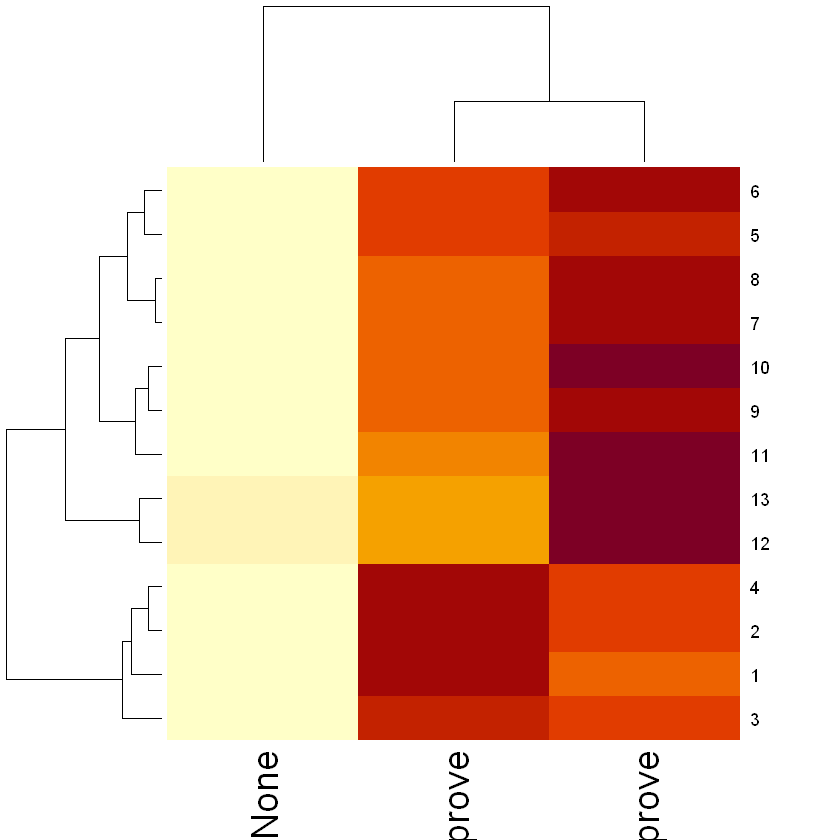

In [4]:
heatmap(as.matrix(obama_rating[,2:ncol(obama_rating)]))

In [5]:
chipotle_count_by_state <- chipotle %>% 
  dplyr::mutate(location = location) %>% 
  dplyr::group_by(state) %>%
  dplyr::summarise(store_count = dplyr::n())
head(chipotle_count_by_state)

state,store_count
Alabama,15
Arizona,85
Arkansas,6
California,421
Colorado,79
Connecticut,24


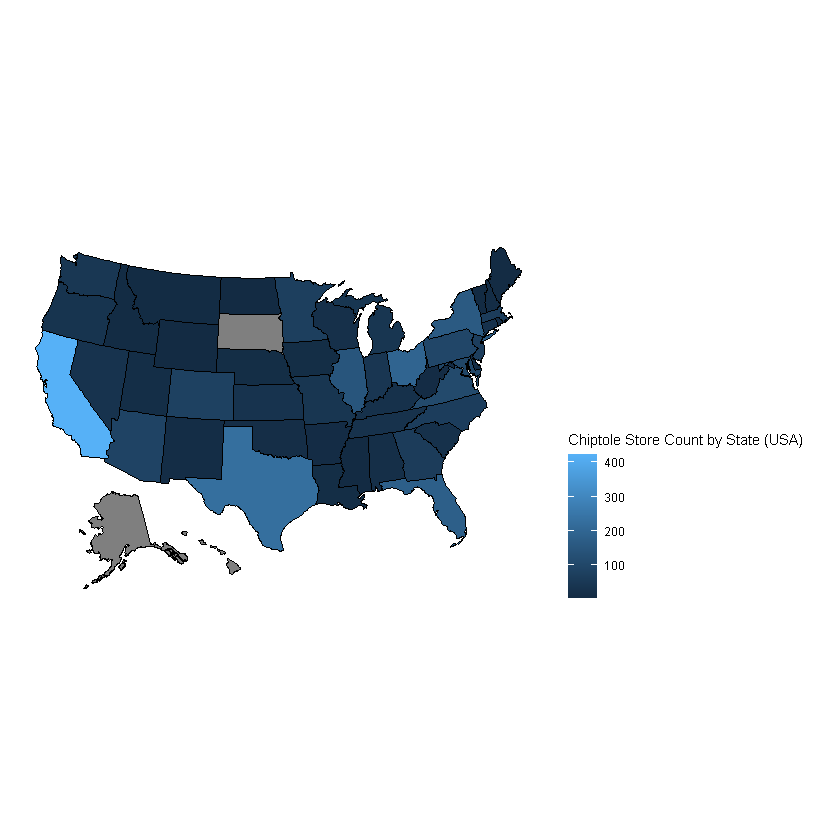

In [6]:
plot_usmap(data = chipotle_count_by_state, values = "store_count") + 
  scale_fill_continuous(name = "Chiptole Store Count by State (USA)", label = scales::comma) + 
  theme(legend.position = "right")

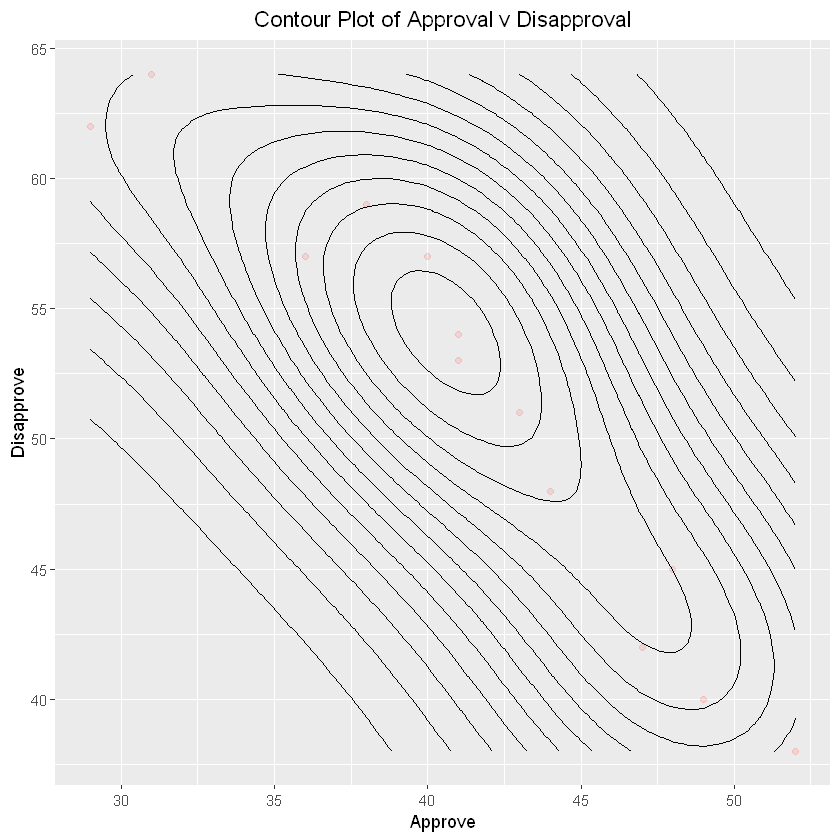

In [7]:
ggplot(obama_rating, aes(x=Approve, y=Disapprove))+
  geom_point(alpha=0.1, col='red')+
  geom_density2d(color='black')+
  ggtitle('Contour Plot of Approval v Disapproval')+
  theme(plot.title = element_text(hjust = 0.5))+
  labs(x='Approve', y='Disapprove')